In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Categoreis in 'gender' variable:     ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethinicity' variable:     ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:        ", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end = " ")
print(df['test preparation course'].unique())


Categoreis in 'gender' variable:      ['female' 'male']
Categories in 'race/ethinicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:         ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
numeric_features= [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print(' {} numerical features : {}'.format(len(numeric_features), numeric_features))
print(' {} categorical features : {}'.format(len(categorical_features), categorical_features))

 3 numerical features : ['math score', 'reading score', 'writing score']
 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
df['total score']= df['math score']+df['reading score']+df['writing score']
df['average']= df['total score']/3


In [17]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print('Number of students who scored full marks in reading: ', reading_full)
print('Number of students who scored full marks in writing: ', writing_full)
print('Number of students who scored full marks in math: ', math_full)

Number of students who scored full marks in reading:  17
Number of students who scored full marks in writing:  14
Number of students who scored full marks in math:  7


In [19]:
reading_less_20 = df[df['reading score']<20]['average'].count()
writing_less_20 = df[df['writing score']<20]['average'].count()
math_less_20 = df[df['math score']<20]['average'].count()

print('Number of students who scored less than 20 in reading: ', reading_less_20)
print('Number of students who scored less than 20 in writing: ', writing_less_20)
print('Number of students who scored less than 20 in math: ', math_less_20)


Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in writing:  3
Number of students who scored less than 20 in math:  4


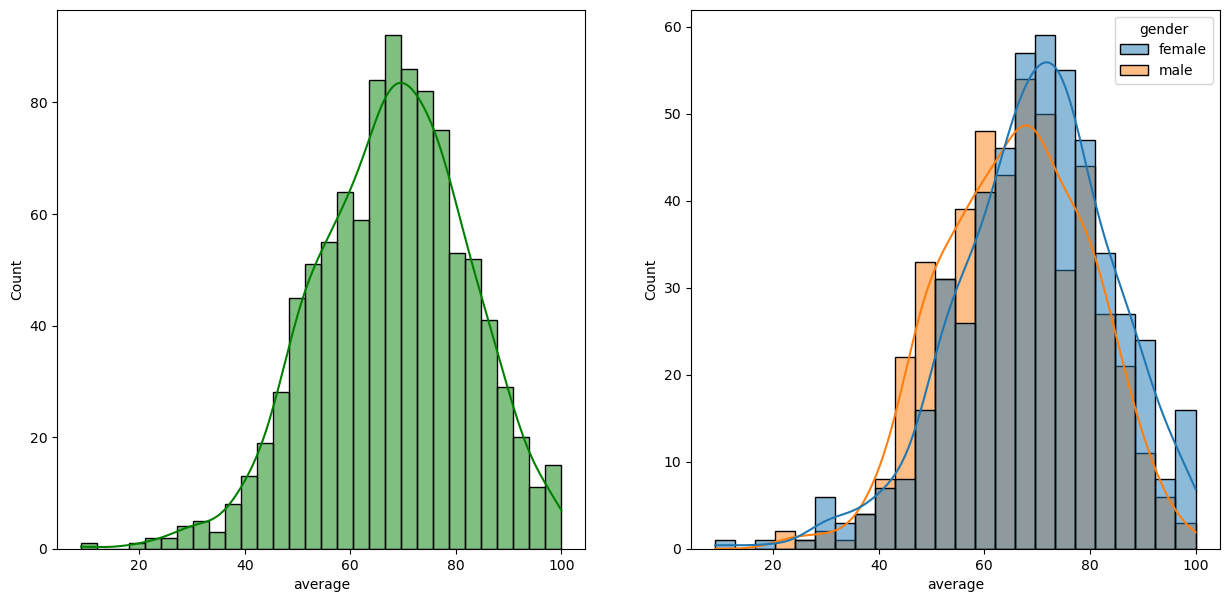

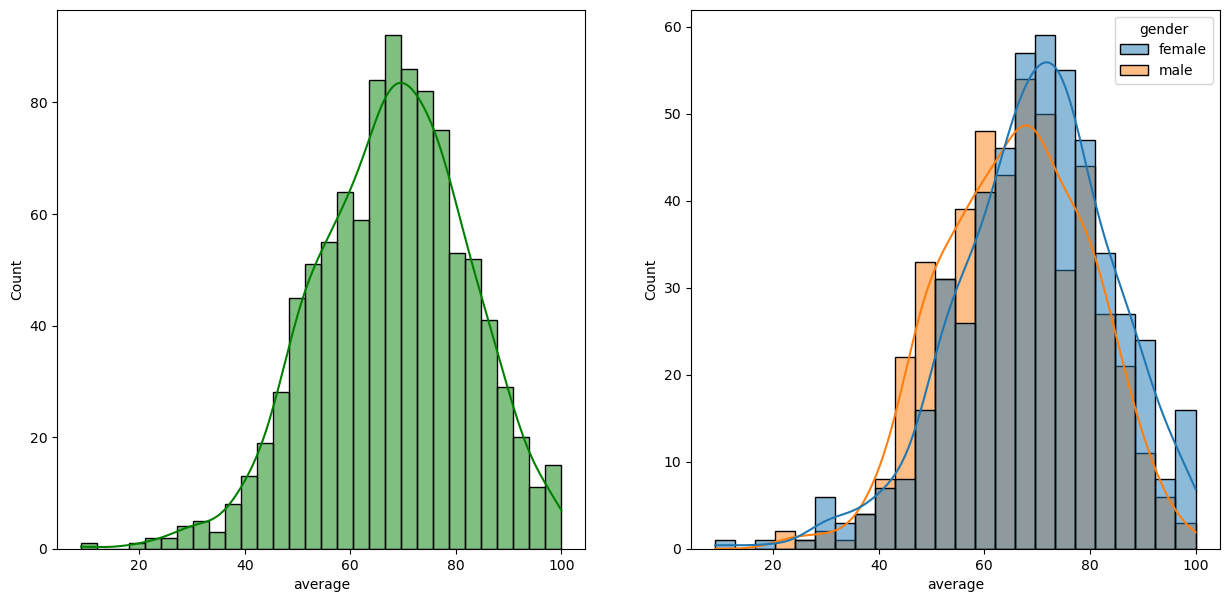

In [21]:
fig, axis = pyplot.subplots(1,2,figsize = (15,7))
pyplot.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30 , kde = True, color = 'g')
pyplot.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
pyplot.show()



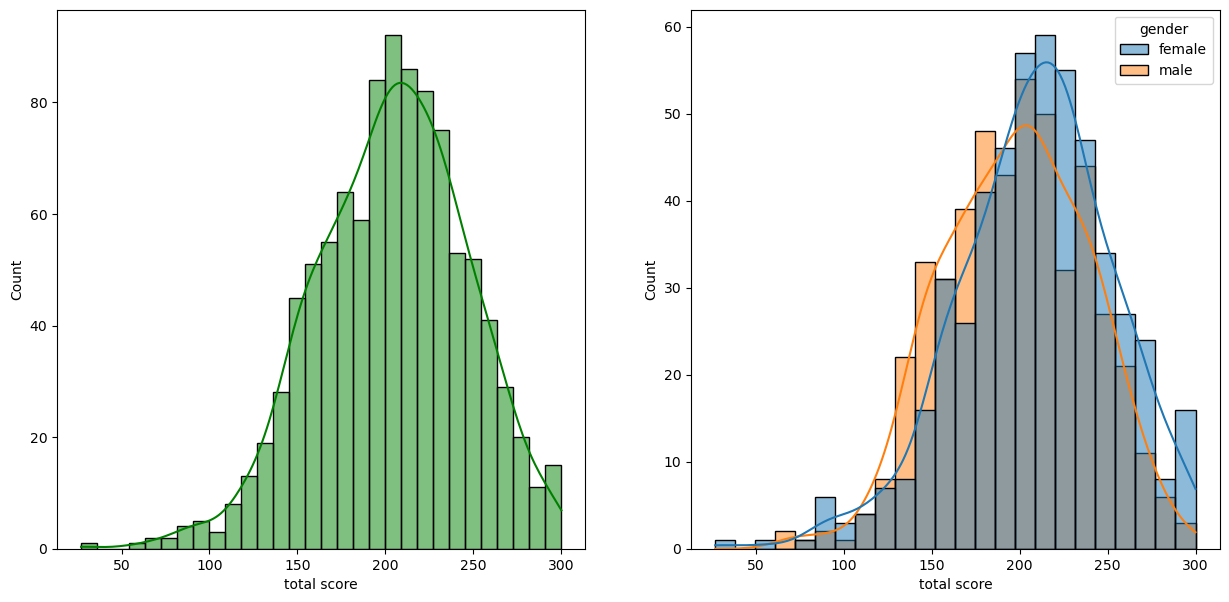

In [25]:
fig, axis = pyplot.subplots(1,2,figsize = (15,7))
pyplot.subplot(121)
sns.histplot(data = df, x = 'total score', bins = 30 , kde = True, color = 'g')
pyplot.subplot(122)
sns.histplot(data = df, x = 'total score', kde = True, hue = 'gender')
pyplot.show()

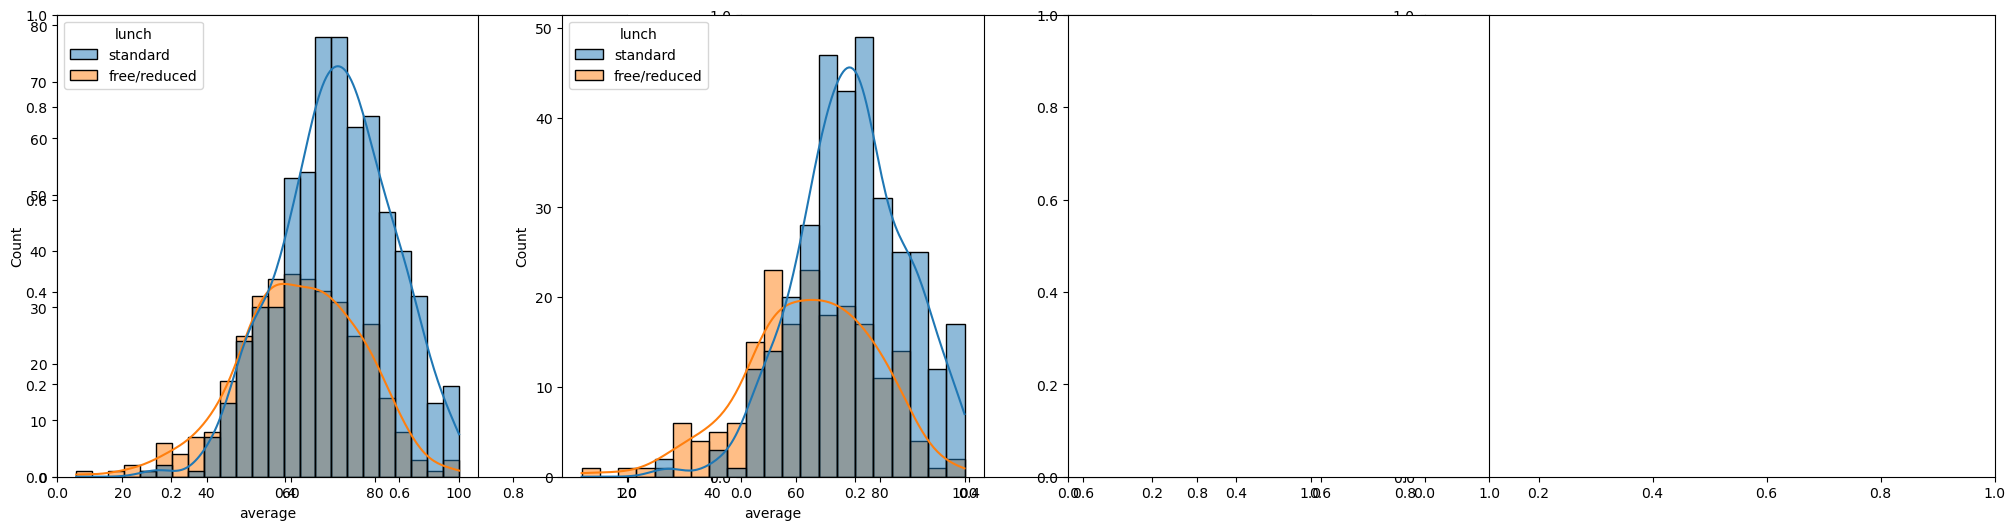

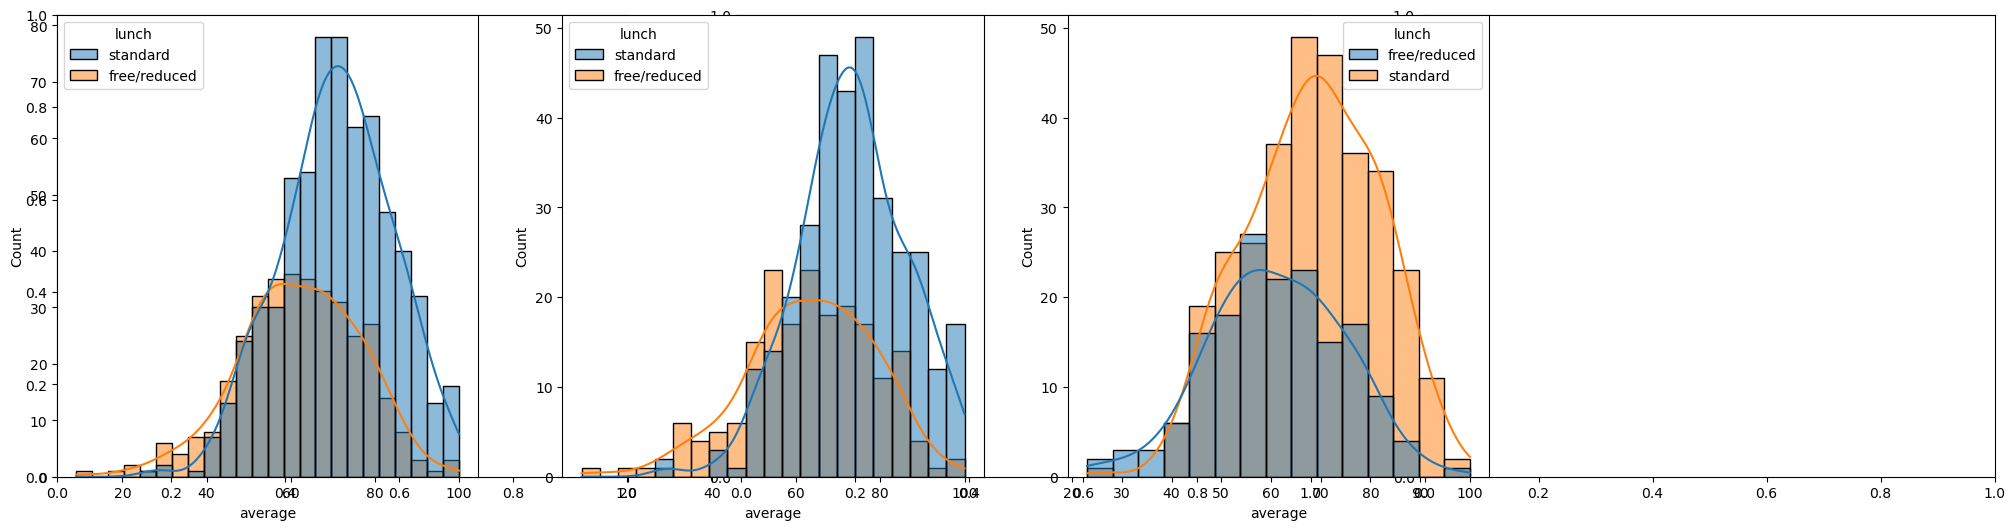

In [27]:
pyplot.subplots(1,3,figsize = (25,6))
pyplot.subplot(141)
sns.histplot(data = df, x ='average', kde = True, hue = 'lunch')
pyplot.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x ='average', kde = True, hue = 'lunch')
pyplot.subplot(143)
sns.histplot(data = df[df.gender =='male'], x ='average', kde = True, hue = 'lunch')
pyplot.show()

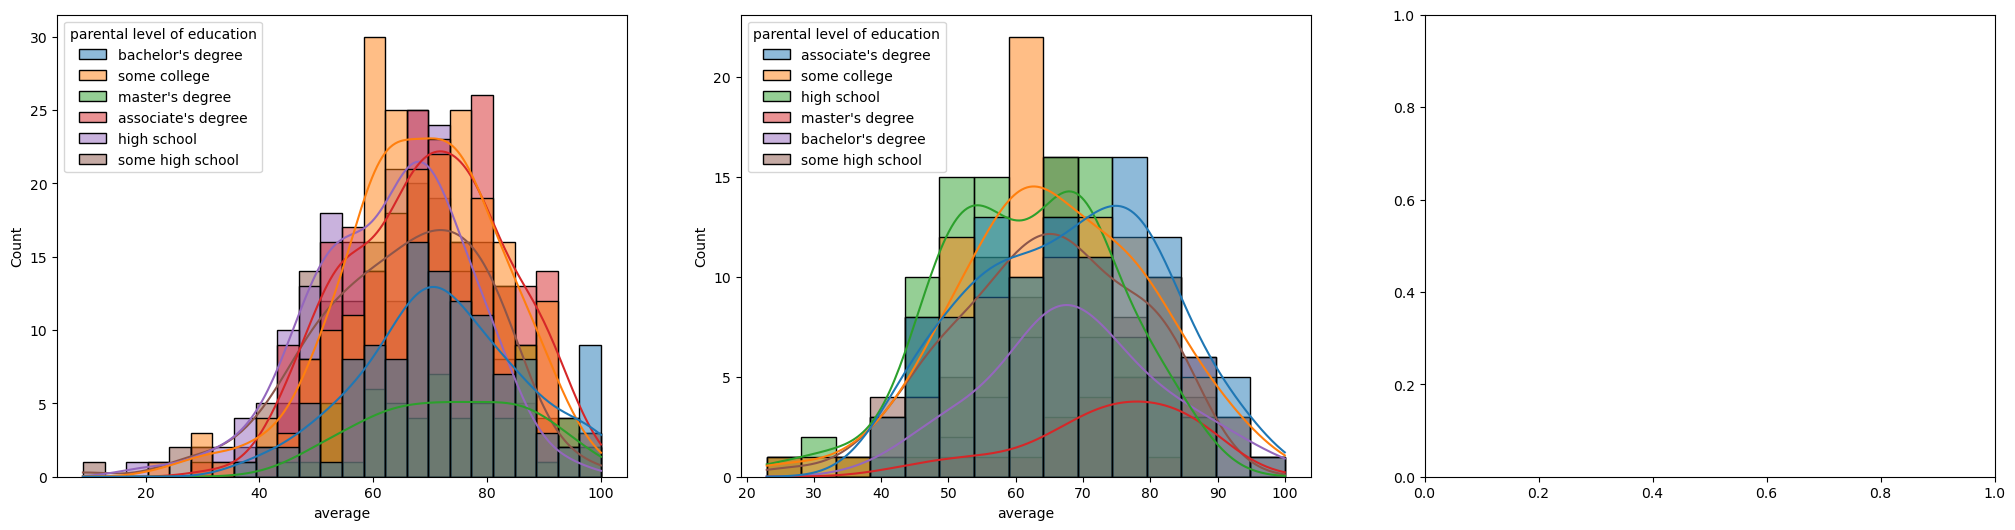

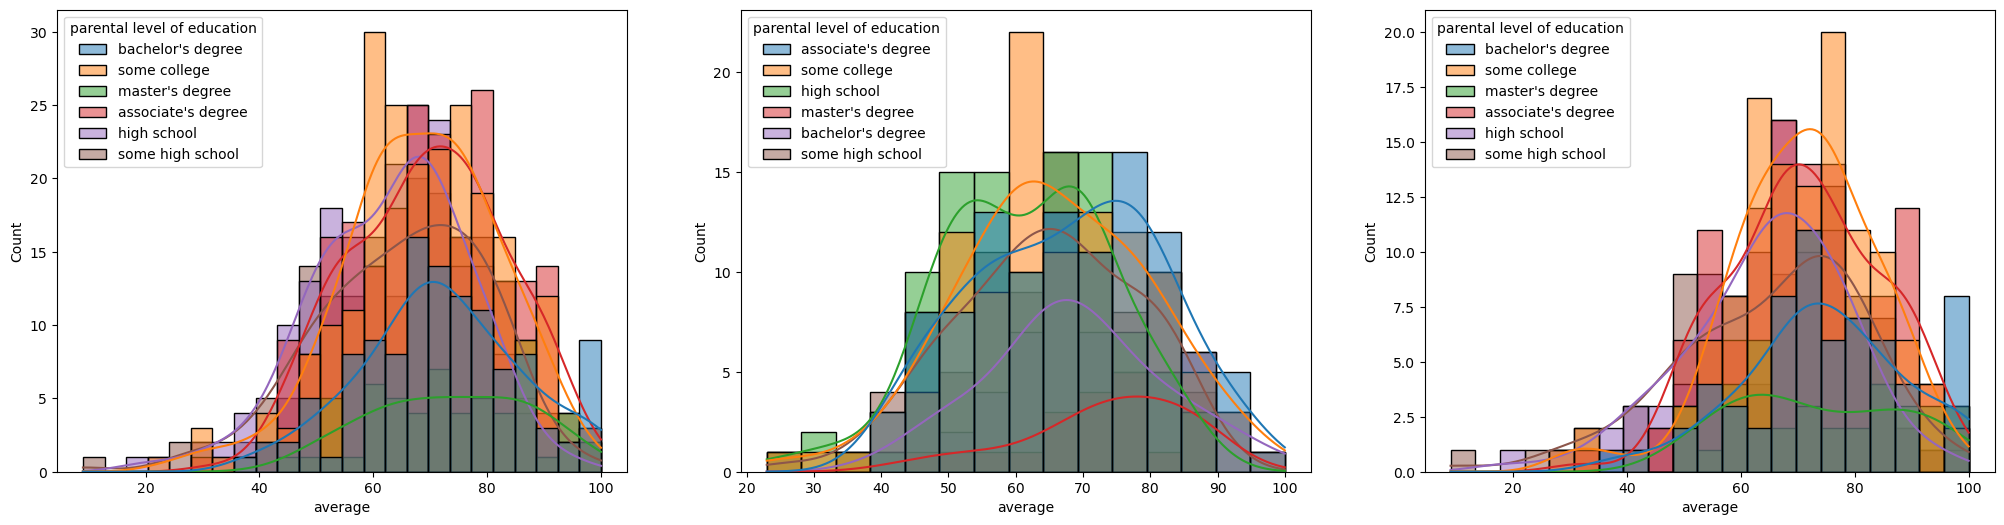

In [32]:
fig , axes = pyplot.subplots(1,3,figsize = (25,6))
pyplot.sca(axes[0])
a = sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
pyplot.sca(axes[1])
a = sns.histplot(data = df[df.gender=='male'], x = 'average',kde = True, hue = 'parental level of education')
pyplot.sca(axes[2])
a = sns.histplot(data = df[df.gender=='female'], x = 'average',kde = True, hue = 'parental level of education')
pyplot.show()

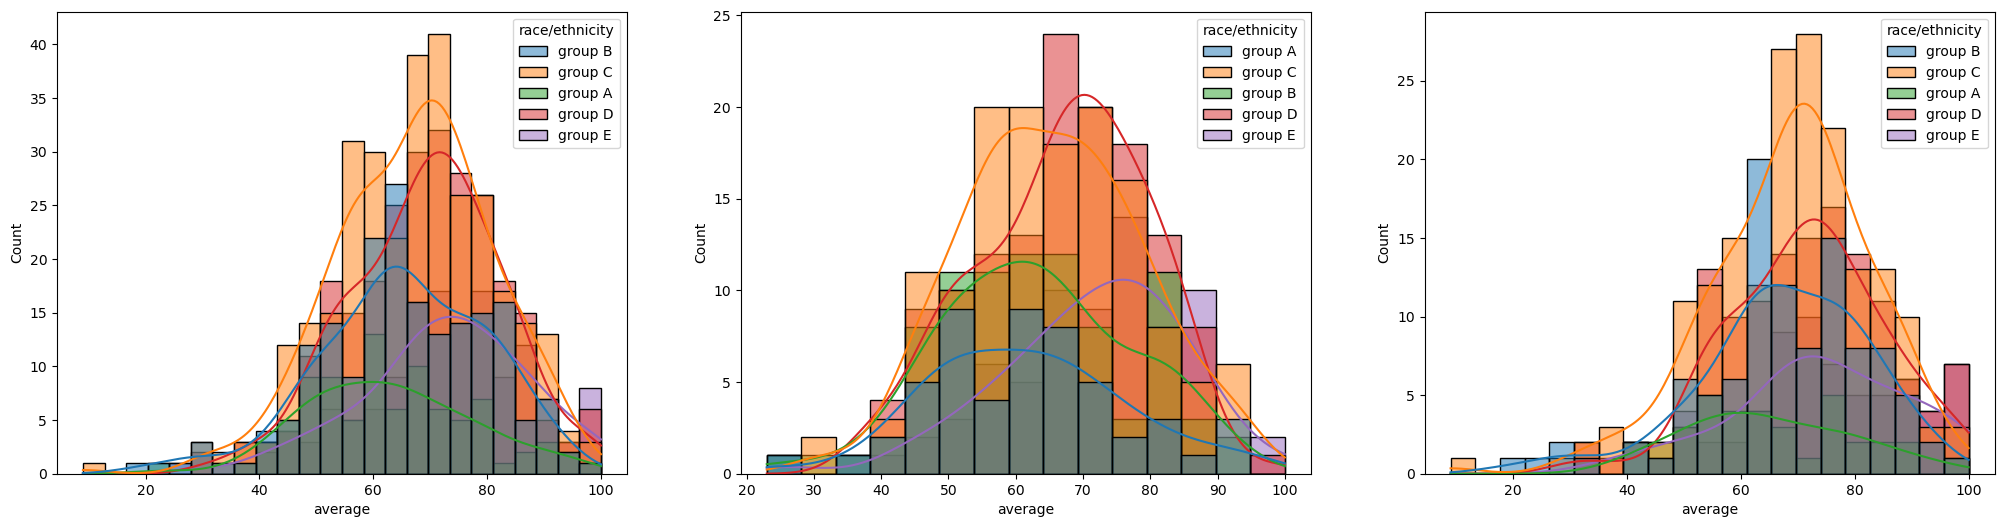

In [33]:
fig , axes = pyplot.subplots(1,3,figsize = (25,6))
pyplot.sca(axes[0])
a = sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
pyplot.sca(axes[1])
a = sns.histplot(data = df[df.gender=='male'], x = 'average',kde = True, hue = 'race/ethnicity')
pyplot.sca(axes[2])
a = sns.histplot(data = df[df.gender=='female'], x = 'average',kde = True, hue = 'race/ethnicity')
pyplot.show()

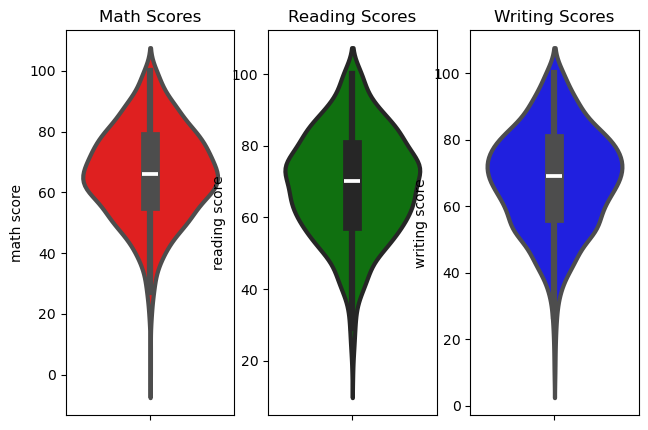

In [34]:
pyplot.figure(figsize=(10,5))
pyplot.subplot(1,4,1)
pyplot.title('Math Scores')
sns.violinplot(y = 'math score', data = df, color = 'r',linewidth= 3)
pyplot.subplot(1,4,2)
pyplot.title('Reading Scores')
sns.violinplot(y = 'reading score', data = df, color = 'g',linewidth= 3)
pyplot.subplot(1,4,3)
pyplot.title('Writing Scores')
sns.violinplot(y = 'writing score', data = df, color = 'b',linewidth= 3)
pyplot.show()

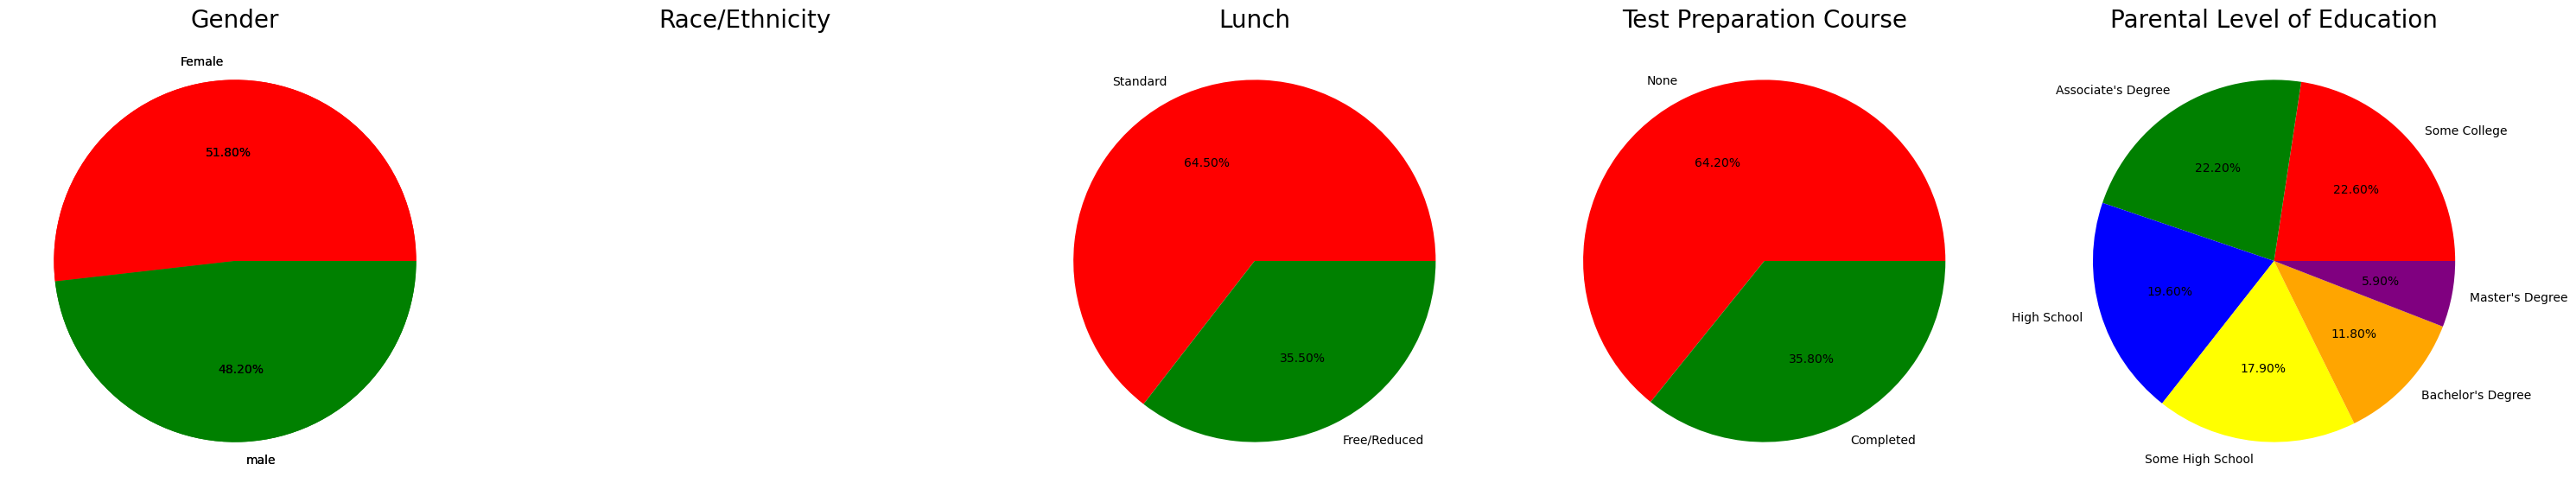

In [37]:
pyplot.rcParams['figure.figsize'] = (30, 12)

pyplot.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'male'
color  = ['red', 'green']

pyplot.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
pyplot.title('Gender', fontsize = 20)
pyplot.axis('off')



pyplot.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['red', 'green']

pyplot.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
pyplot.title('Lunch', fontsize = 20)
pyplot.axis('off')

pyplot.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

pyplot.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
pyplot.title('Test Preparation Course', fontsize = 20)
pyplot.axis('off')

pyplot.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = "Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

pyplot.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
pyplot.title('Parental Level of Education', fontsize = 20)
pyplot.axis('off')

pyplot.tight_layout()
pyplot.grid()

pyplot.show()